In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from krippendorff import alpha
from cliffs_delta import cliffs_delta

sns.set_theme(style="whitegrid", context="paper", font_scale=1.3)

In [3]:
res = pd.read_csv("results.csv", sep=";", header=None)
res2 = pd.read_csv("rq4_eval.csv", sep=";", header=None)

In [4]:
res

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,SE_Expertise,Quantum_Expertise,Run1,Run1,Run1,Run1,Run1,Run1,Run2,Run2,...,Run2,Run2,Run2,Run2,Run3,Run3,Run3,Run3,Run3,Run3
1,NaN,NaN,simple,simple,simple,complex,complex,complex,complex,complex,...,complex,simple,simple,simple,simple,simple,simple,complex,complex,complex
2,NaN,NaN,gpt,llama,tiny,tiny,gpt,llama,tiny,gpt,...,llama,llama,tiny,gpt,llama,tiny,gpt,tiny,gpt,llama
3,5-10 years,3-4 years,2,4,1,1,5,4,3,3,...,5,2,1,2,2,1,1,4,3,5
4,3-4 years,1-2 years,3,2,1,1,4,4,2,2,...,4,1,1,1,1,1,1,3,3,3
5,3-4 years,1-2 years,2,3,1,3,3,3,5,2,...,4,2,2,2,2,1,2,3,3,4
6,5-10 years,Under a year,3,3,1,4,2,4,1,2,...,4,3,1,3,3,1,3,1,2,3


In [5]:
res_t = res.drop(columns=[0,1]).T
res_t.columns = ["Run", "Prompt", "Model", "Score1", "Score2", "Score3", "Score4"]
res_t["Score1"] = res_t["Score1"].astype(float)
res_t["Score2"] = res_t["Score2"].astype(float)
res_t["Score3"] = res_t["Score3"].astype(float)
res_t["Score4"] = res_t["Score4"].astype(float)

res_t["Score"] = res_t[["Score1", "Score2", "Score3", "Score4"]].mean(axis=1)
res_t["Prompt"] = res_t["Prompt"].str.strip()

In [6]:
res2_t = res2.drop(columns=[0, 1]).T
res2_t.columns = ["Model", "Score1", "Score2", "Score3", "Score4"]
res2_t["Score1"] = res2_t["Score1"].astype(float)
res2_t["Score2"] = res2_t["Score2"].astype(float)
res2_t["Score3"] = res2_t["Score3"].astype(float)
res2_t["Score4"] = res2_t["Score4"].astype(float)

res2_t["Score"] = res2_t[["Score1", "Score2", "Score3", "Score4"]].mean(axis=1)

## Krippendorff alpha

In [17]:
kr = res.loc[:,2:].drop([0,1,2])
kr = kr.astype(float)

alpha(kr.values, level_of_measurement="interval", value_domain=[1,2,3,4,5])

0.4716537111986928

In [4]:
kr2 = res2.loc[:, 2:].drop([0])
kr2 = kr2.astype(float)

alpha(kr2.values, level_of_measurement="interval", value_domain=[1, 2, 3, 4, 5])

0.8985306668511983

## RQ 1

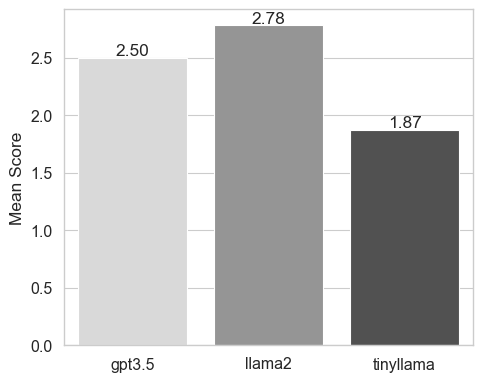

In [133]:
rq1 = res_t.pivot_table(
    index="Run", columns=["Model"], values=["Score"], aggfunc="mean"
)
fig, ax = plt.subplots(figsize=(5,4))
ax = sns.barplot(data=rq1.agg("mean").reset_index(), x="Model", y=0, palette="Greys")
plt.ylabel("Mean Score")
plt.xlabel("")
plt.xticks([0, 1, 2], ["gpt3.5", "llama2", "tinyllama"])

for p in ax.patches:
    if not p.get_height() == 0.0:
        ax.annotate(
            f"{p.get_height():.2f}",
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 5),
            textcoords="offset points",
        )
    # p.set_hatch(hatch)
plt.tight_layout()
plt.savefig("figures/rq1.pdf")

In [134]:
count = res_t.drop(columns="Score").melt(id_vars=["Run", "Prompt", "Model"], value_vars=["Score1", "Score2", "Score3", "Score4"], var_name="Score_type", value_name="Score")#.groupby(["Model", "Score"]).agg("count").reset_index()

In [135]:
count['Score'] = count['Score'].astype(str)

/Users/giord/miniconda3/envs/xquantum/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/giord/miniconda3/envs/xquantum/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/giord/miniconda3/envs/xquantum/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/giord/miniconda3/envs/xquantu

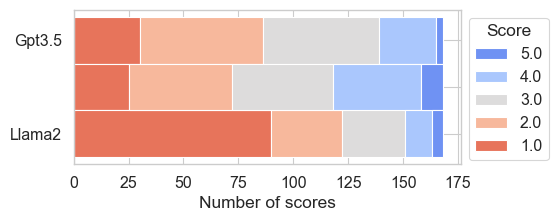

In [136]:
fig,ax = plt.subplots(figsize=(5,2))
ax = sns.histplot(data=count, y="Model", hue="Score", multiple="stack", palette="coolwarm", hue_order=["5.0", "4.0", "3.0", "2.0", "1.0"], alpha=1)
ax.set(xlabel="Number of scores", ylabel="")
ax.yaxis.set_ticklabels(["Gpt3.5", "", "Llama2", "", "Tinyllama"])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.savefig("figures/rq1_dist.pdf", bbox_inches="tight")
plt.show()

In [137]:
rq1.aggregate(["mean", "median"]).to_latex("tables/rq1.tex")

In [138]:
gpt = res_t[res_t["Model"] == "gpt"]
llama = res_t[res_t["Model"] == "llama"]
tiny = res_t[res_t["Model"] == "tiny"]

### Statistical Test

In [139]:
stats.shapiro(gpt["Score"])

ShapiroResult(statistic=0.9394099463478517, pvalue=0.027249246042086298)

In [140]:
stats.shapiro(llama["Score"])

ShapiroResult(statistic=0.8768224019443664, pvalue=0.0003127229831499441)

In [141]:
stats.shapiro(tiny["Score"])

ShapiroResult(statistic=0.9061880178752847, pvalue=0.0022168304407318502)

In [142]:
w1, p_val1 = stats.wilcoxon(gpt["Score"], llama["Score"])

In [143]:
w2, p_val2 = stats.wilcoxon(gpt["Score"], tiny["Score"])

In [144]:
w3, p_val3 = stats.wilcoxon(llama["Score"], tiny["Score"])

In [145]:
# Bonferroni correction

p_vals = np.multiply([p_val1, p_val2, p_val3], 3) 

In [146]:
pd.DataFrame({
  "Stats": [w1, w2, w3],
  "p-value": p_vals,
  "$\delta$": [cliffs_delta(gpt["Score"], llama["Score"])[0], cliffs_delta(gpt["Score"], tiny["Score"])[0], cliffs_delta(llama["Score"], tiny["Score"])[0]]
}, index=["gpt-llama", "gpt-tiny", "llama-tiny"])
#.to_latex("rq1_stats.tex")

,Stats,p-value,$\delta$
gpt-llama,141.5,0.021716,-0.185374
gpt-tiny,53.5,0.000031,0.439909
llama-tiny,38.0,0.000001,0.526077


## RQ 2

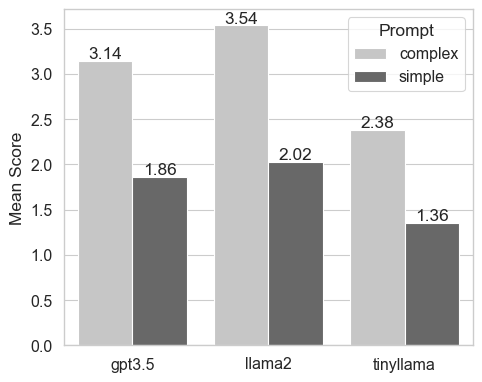

In [147]:
rq2 = res_t.pivot_table(
    index="Run", columns=["Model", "Prompt"], values=["Score"], aggfunc="mean"
)
fig, ax = plt.subplots(figsize=(5,4))
ax = sns.barplot(
    data=rq2.agg("mean").reset_index(), 
    x="Model", 
    y=0, 
    hue="Prompt",
    palette="Greys")
# show values on top of bars
for p in ax.patches:
    if not p.get_height()==0.0:
        ax.annotate(
            f"{p.get_height():.2f}",
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 5),
            textcoords="offset points",
        )
sns.move_legend(ax, "upper right", frameon=True)
plt.ylabel("Mean Score")
plt.xlabel("")
plt.xticks([0, 1, 2], ["gpt3.5", "llama2", "tinyllama"])
plt.tight_layout()
plt.savefig("figures/rq2.pdf")

### Statistical Test

In [148]:
gpt_simple = res_t[(res_t["Model"] == "gpt")&(res_t["Prompt"]=='simple')]["Score"]
gpt_complex = res_t[(res_t["Model"] == "gpt") & (res_t["Prompt"] == "complex")][
    "Score"
]

llama_simple = res_t[(res_t["Model"] == "llama") & (res_t["Prompt"] == "simple")]["Score"]
llama_complex = res_t[(res_t["Model"] == "llama") & (res_t["Prompt"] == "complex")][
    "Score"
]

tinyllama_simple = res_t[(res_t["Model"] == "tiny") & (res_t["Prompt"] == "simple")]["Score"]
tinyllama_complex = res_t[(res_t["Model"] == "tiny") & (res_t["Prompt"] == "complex")][
    "Score"
]

#### Shapiro-Wilk Test for Normality

In [149]:
stats.shapiro(gpt_simple)

ShapiroResult(statistic=0.9291981888088285, pvalue=0.13264979282535594)

In [150]:
stats.shapiro(gpt_complex)

ShapiroResult(statistic=0.9505965443602056, pvalue=0.3495900767392157)

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([1.25, 1.5 , 1.5 , 1.5 , 1.5 , 1.75, 1.75, 1.75, 1.75, 1.75, 1.75,
         2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.25, 2.5 , 2.5 ])),
 (0.3261057585721397, 1.8571428571428572, 0.963607041891071))

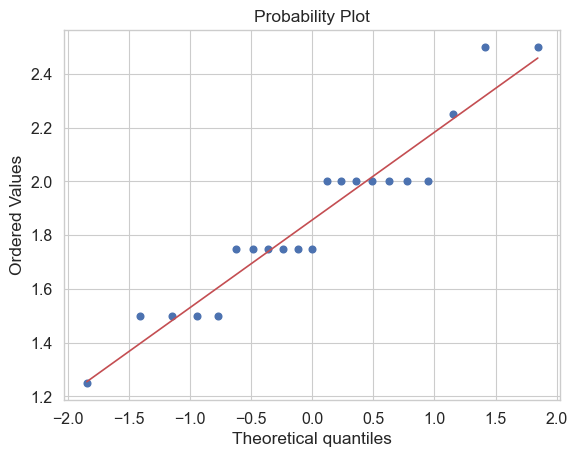

In [151]:
# qqplot
stats.probplot(gpt_simple, dist="norm", plot=plt)

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([2.25, 2.5 , 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 3.  , 3.25, 3.25,
         3.25, 3.25, 3.25, 3.5 , 3.5 , 3.5 , 3.5 , 3.75, 3.75, 4.  ])),
 (0.47041969935400835, 3.142857142857143, 0.9766120098102848))

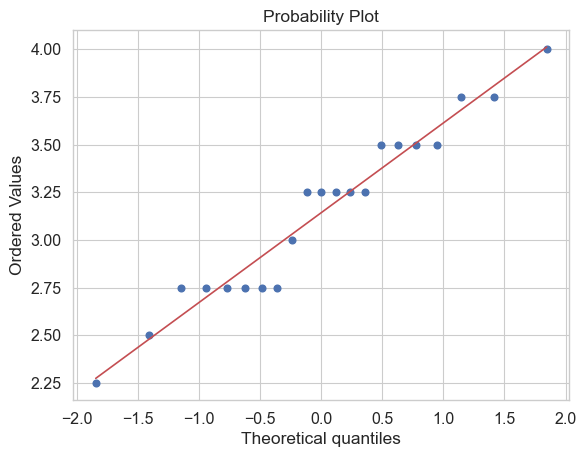

In [152]:
stats.probplot(gpt_complex, dist="norm", plot=plt)

In [153]:
stats.shapiro(llama_simple)

ShapiroResult(statistic=0.7929722075919757, pvalue=0.0005132961024135242)

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([1.5 , 1.5 , 1.75, 1.75, 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  ,
         2.  , 2.  , 2.  , 2.  , 2.  , 2.25, 2.25, 2.25, 2.25, 3.  ])),
 (0.2802490352763081, 2.0238095238095237, 0.8731785864103621))

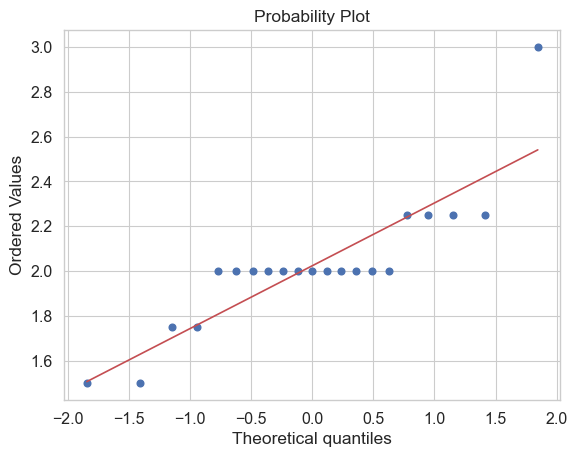

In [154]:
stats.probplot(llama_simple, dist="norm", plot=plt)

In [155]:
stats.shapiro(llama_complex)

ShapiroResult(statistic=0.8750517254391459, pvalue=0.011839767596732666)

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([1.5 , 2.25, 2.75, 2.75, 3.25, 3.25, 3.5 , 3.5 , 3.75, 3.75, 3.75,
         3.75, 3.75, 3.75, 3.75, 4.  , 4.  , 4.25, 4.25, 4.25, 4.5 ])),
 (0.7057700296150751, 3.5357142857142856, 0.9302494600363892))

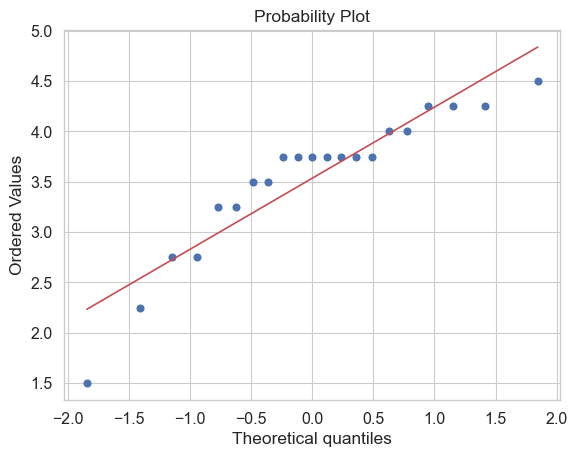

In [156]:
stats.probplot(llama_complex, dist="norm", plot=plt)

In [157]:
stats.shapiro(tinyllama_simple)

ShapiroResult(statistic=0.8472109834123442, pvalue=0.003804282814515208)

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.25, 1.25, 1.25, 1.25,
         1.25, 1.25, 1.5 , 1.5 , 1.5 , 1.5 , 1.75, 2.  , 2.  , 2.25])),
 (0.36551543042296925, 1.3571428571428572, 0.9254387151255364))

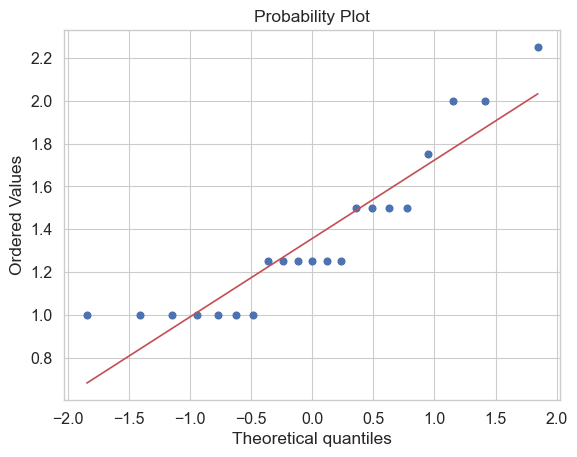

In [158]:
stats.probplot(tinyllama_simple, dist="norm", plot=plt)

In [159]:
stats.shapiro(tinyllama_complex)

ShapiroResult(statistic=0.9416245204146176, pvalue=0.23459611852539386)

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([1.  , 1.  , 1.5 , 2.  , 2.  , 2.  , 2.  , 2.25, 2.25, 2.25, 2.25,
         2.5 , 2.75, 2.75, 2.75, 2.75, 2.75, 3.25, 3.25, 3.25, 3.5 ])),
 (0.7037208882147289, 2.380952380952381, 0.9734335542442006))

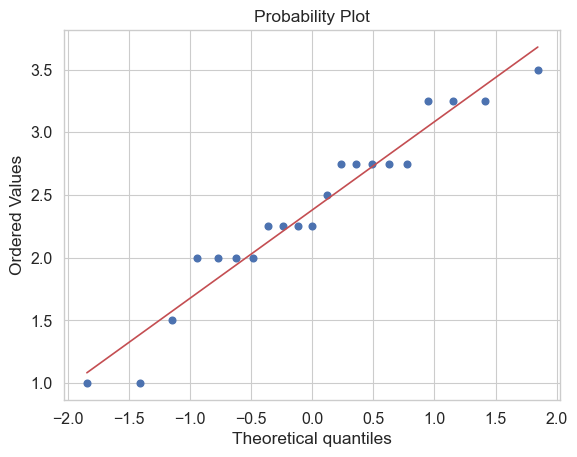

In [160]:
stats.probplot(tinyllama_complex, dist="norm", plot=plt)

### Wilcoxon Signed-Rank Test for gpt distribution

In [161]:
stats.wilcoxon(gpt_simple, gpt_complex)

WilcoxonResult(statistic=0.0, pvalue=9.5367431640625e-07)

### Wilcoxon Signed-Rank Test for llama distribution

In [162]:
stats.wilcoxon(llama_simple, llama_complex)

WilcoxonResult(statistic=2.0, pvalue=2.86102294921875e-06)

### Wilcoxon Signed-Rank Test for tinyllama distribution

In [163]:
stats.wilcoxon(tinyllama_simple, tinyllama_complex)

WilcoxonResult(statistic=1.5, pvalue=0.00010703333092589676)

In [164]:
np.multiply([stats.wilcoxon(gpt_simple, gpt_complex)[1] , stats.wilcoxon(llama_simple, llama_complex)[1], stats.wilcoxon(tinyllama_simple, tinyllama_complex)[1]], 3)

array([2.86102295e-06, 8.58306885e-06, 3.21099993e-04])

In [165]:
data = pd.DataFrame(
    index=["gpt", "llama", "tinylllama"],
    columns=[
        "simple_mean",
        "simple_median",
        "complex_mean",
        "complex_median",
        "W Stat",
        "p-value",
        "$\delta$",
    ],
    data=[
        [
            gpt_simple.mean(),
            gpt_simple.median(),
            gpt_complex.mean(),
            gpt_complex.median(),
            stats.wilcoxon(gpt_simple, gpt_complex)[0],
            stats.wilcoxon(gpt_simple, gpt_complex)[1] * 3,
            cliffs_delta(gpt_simple, gpt_complex)[0],
        ],
        [
            llama_simple.mean(),
            llama_simple.median(),
            llama_complex.mean(),
            llama_complex.median(),
            stats.wilcoxon(llama_simple, llama_complex)[0],
            stats.wilcoxon(llama_simple, llama_complex)[1] * 3,
            cliffs_delta(llama_simple, llama_complex)[0],
        ],
        [
            tinyllama_simple.mean(),
            tinyllama_simple.median(),
            tinyllama_complex.mean(),
            tinyllama_complex.median(),
            stats.wilcoxon(tinyllama_simple, tinyllama_complex)[0],
            stats.wilcoxon(tinyllama_simple, tinyllama_complex)[1] * 3,
            cliffs_delta(tinyllama_simple, tinyllama_complex)[0],
        ],
    ],
)
data.to_latex("tables/rq2.tex")

In [166]:
count = res_t.drop(columns="Score").melt(
    id_vars=["Run", "Prompt", "Model"],
    value_vars=["Score1", "Score2", "Score3", "Score4"],
    var_name="Score_type",
    value_name="Score",
)

count['Score'] = count['Score'].astype(str)
count['Model+Prompt'] = count['Model'] + " " + count['Prompt']

In [167]:
count

,Run,Prompt,Model,Score_type,Score,Model+Prompt
0,Run1,simple,gpt,Score1,2.0,gpt simple
1,Run1,simple,llama,Score1,4.0,llama simple
2,Run1,simple,tiny,Score1,1.0,tiny simple
3,Run1,complex,tiny,Score1,1.0,tiny complex
4,Run1,complex,gpt,Score1,5.0,gpt complex
...,...,...,...,...,...,...
499,Run3,simple,tiny,Score4,1.0,tiny simple
500,Run3,simple,gpt,Score4,3.0,gpt simple
501,Run3,complex,tiny,Score4,1.0,tiny complex
502,Run3,complex,gpt,Score4,2.0,gpt complex


/Users/giord/miniconda3/envs/xquantum/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/giord/miniconda3/envs/xquantum/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/giord/miniconda3/envs/xquantum/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/giord/miniconda3/envs/xquantu

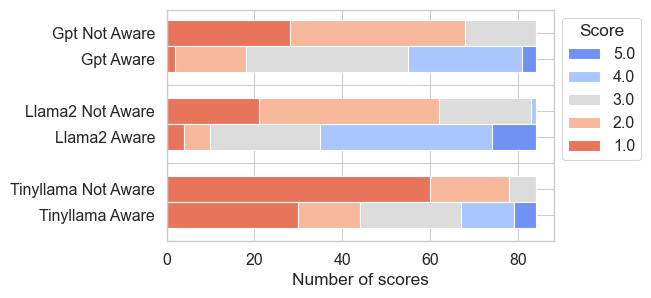

In [168]:
fig, ax = plt.subplots(figsize=(5, 3))

count["Model+Prompt"] = pd.Categorical(
    count["Model+Prompt"],
    [
        "gpt simple",
        "gpt complex",
        "",
        "llama simple",
        "llama complex",
        " ",
        "tiny simple",
        "tiny complex",
        "  ",
    ],
)

ax = sns.histplot(
    data=count[
        (count["Model+Prompt"] == "gpt simple")
        | (count["Model+Prompt"] == "gpt complex")
    ],
    y="Model+Prompt",
    hue="Score",
    multiple="stack",
    palette="coolwarm",
    hue_order=["5.0", "4.0", "3.0", "2.0", "1.0"],
    alpha=1,
)

ax1 = sns.histplot(
    data=count[
        (count["Model+Prompt"] == "llama simple")
        | (count["Model+Prompt"] == "llama complex")
    ],
    y="Model+Prompt",
    hue="Score",
    multiple="stack",
    palette="coolwarm",
    hue_order=["5.0", "4.0", "3.0", "2.0", "1.0"],
    alpha=1
)


ax2 = sns.histplot(
    data=count[
        (count["Model+Prompt"] == "tiny simple")
        | (count["Model+Prompt"] == "tiny complex")
    ],
    y="Model+Prompt",
    hue="Score",
    multiple="stack",
    palette="coolwarm",
    hue_order=["5.0", "4.0", "3.0", "2.0", "1.0"],
    alpha=1,
)

plt.xlabel("Number of scores")
plt.ylabel("")
plt.yticks(
    ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8],  # Aggiungi un tick in più
    labels=[
        "Gpt Not Aware",
        "Gpt Aware",
        "",  # Aggiungi un'etichetta vuota per lo spazio extra
        "Llama2 Not Aware",
        "Llama2 Aware",
        "",  # Aggiungi un'etichetta vuota per lo spazio extra
        "Tinyllama Not Aware",
        "Tinyllama Aware",
        "",  # Aggiungi un'etichetta vuota per lo spazio extra
    ],
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# add space between tick 1 and 2
plt.savefig("figures/rq2_dist.pdf", bbox_inches="tight")
plt.show()

In [169]:
count["Model+Prompt"]

0         gpt simple
1       llama simple
2        tiny simple
3       tiny complex
4        gpt complex
           ...      
499      tiny simple
500       gpt simple
501     tiny complex
502      gpt complex
503    llama complex
Name: Model+Prompt, Length: 504, dtype: category
Categories (9, object): ['gpt simple', 'gpt complex', '', 'llama simple', ..., ' ', 'tiny simple', 'tiny complex', '  ']

## RQ 3

In [170]:
rq3 = res_t.pivot_table(columns=["Model", "Prompt", "Run"], values=["Score"], aggfunc="mean")

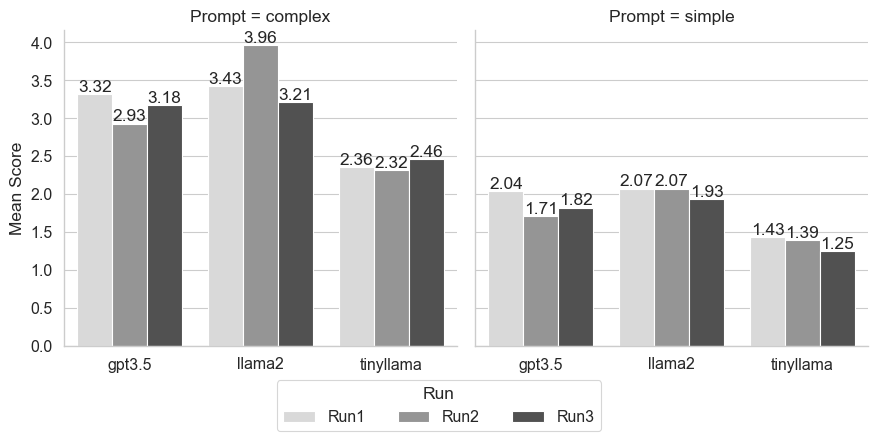

In [171]:
grid = sns.catplot(
    data=rq3.aggregate("mean").reset_index(),
    x="Model",
    y=0,
    hue="Run",
    col="Prompt",
    kind="bar",
    height=4,
    palette="Greys",
)
grid.set_axis_labels("", "Mean Score")

# show values on top of bars
for ax in grid.axes.flat:
    for p in ax.patches:
        if not p.get_height()==0.0:
            ax.annotate(
                f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center",
                va="center",
                xytext=(0, 5),
                textcoords="offset points",
            )
sns.move_legend(grid, "lower center", ncol=3, frameon=True, bbox_to_anchor=(0.5, -0.12))
grid.set_xticklabels(["gpt3.5", "llama2", "tinyllama"])
plt.tight_layout()
plt.savefig("figures/rq3.pdf", bbox_inches="tight")

### Statistical Test

#### GPT

In [172]:
gpt1_s = res_t[
    (res_t["Model"] == "gpt")
    & (res_t["Prompt"] == "simple")
    & (res_t["Run"] == "Run1")
]["Score"]

gpt2_s = res_t[
    (res_t["Model"] == "gpt") & (res_t["Prompt"] == "simple") & (res_t["Run"] == "Run2")
]["Score"]

gpt3_s = res_t[
    (res_t["Model"] == "gpt") & (res_t["Prompt"] == "simple") & (res_t["Run"] == "Run3")
]["Score"]

In [173]:
stats.shapiro(gpt1_s)

ShapiroResult(statistic=0.9202476025992193, pvalue=0.47131835286954893)

In [174]:
stats.shapiro(gpt2_s)

ShapiroResult(statistic=0.8180887757529729, pvalue=0.061550147978133345)

In [175]:
stats.shapiro(gpt3_s)

ShapiroResult(statistic=0.8333845641645437, pvalue=0.08613669465637135)

In [176]:
stats.kruskal(gpt1_s, gpt2_s, gpt3_s)

KruskalResult(statistic=3.5585138088615196, pvalue=0.1687635081004064)

In [177]:
gpt1_c = res_t[
    (res_t["Model"] == "gpt")
    & (res_t["Prompt"] == "complex")
    & (res_t["Run"] == "Run1")
]["Score"]

gpt2_c = res_t[
    (res_t["Model"] == "gpt") & (res_t["Prompt"] == "complex") & (res_t["Run"] == "Run2")
]["Score"]

gpt3_c = res_t[
    (res_t["Model"] == "gpt") & (res_t["Prompt"] == "complex") & (res_t["Run"] == "Run3")
]["Score"]

In [178]:
stats.shapiro(gpt1_c)

ShapiroResult(statistic=0.9390478359216043, pvalue=0.6301591986192884)

In [179]:
stats.shapiro(gpt2_c)

ShapiroResult(statistic=0.9197901633247106, pvalue=0.467763713015455)

In [180]:
stats.shapiro(gpt3_c)

ShapiroResult(statistic=0.8180887757529729, pvalue=0.061550147978133345)

In [181]:
stats.kruskal(gpt1_c, gpt2_c, gpt3_c)

KruskalResult(statistic=2.4791626284163777, pvalue=0.28950540436722366)

#### LLAMA

In [213]:
llama1_c = res_t[
    (res_t["Model"] == "llama")
    & (res_t["Prompt"] == "complex")
    & (res_t["Run"] == "Run1")
]["Score"]

llama2_c = res_t[
    (res_t["Model"] == "llama") & (res_t["Prompt"] == "complex") & (res_t["Run"] == "Run2")
]["Score"]

llama3_c = res_t[
    (res_t["Model"] == "llama") & (res_t["Prompt"] == "complex") & (res_t["Run"] == "Run3")
]["Score"]

In [214]:
stats.shapiro(llama1_c)

ShapiroResult(statistic=0.810770490809439, pvalue=0.05226521648375003)

In [215]:
stats.shapiro(llama2_c)

ShapiroResult(statistic=0.8585659395402375, pvalue=0.1469708548930031)

In [216]:
stats.shapiro(llama3_c)

ShapiroResult(statistic=0.9222174366916898, pvalue=0.4868164506502304)

In [217]:
stats.kruskal(llama1_c, llama2_c, llama3_c)

KruskalResult(statistic=5.048393341076273, pvalue=0.08012265182731258)

In [218]:
llama1_s = res_t[
    (res_t["Model"] == "llama")
    & (res_t["Prompt"] == "simple")
    & (res_t["Run"] == "Run1")
]["Score"]

llama2_s = res_t[
    (res_t["Model"] == "llama") & (res_t["Prompt"] == "simple") & (res_t["Run"] == "Run2")
]["Score"]

llama3_s = res_t[
    (res_t["Model"] == "llama") & (res_t["Prompt"] == "simple") & (res_t["Run"] == "Run3")
]["Score"]

In [219]:
stats.shapiro(llama1_s)

ShapiroResult(statistic=0.8808910124677423, pvalue=0.23043263529734154)

In [220]:
stats.shapiro(llama2_s)

ShapiroResult(statistic=0.6003990298280553, pvalue=0.0002751787013147552)

In [221]:
stats.shapiro(llama3_s)

ShapiroResult(statistic=0.8693003412510614, pvalue=0.18302792575851945)

In [222]:
stats.kruskal(llama1_s, llama2_s, llama3_s)

KruskalResult(statistic=1.331953071083522, pvalue=0.5137715664600289)

#### TinyLLAMA

In [223]:
tiny1_c = res_t[
    (res_t["Model"] == "tiny")
    & (res_t["Prompt"] == "complex")
    & (res_t["Run"] == "Run1")
]["Score"]

tiny2_c = res_t[
    (res_t["Model"] == "tiny") & (res_t["Prompt"] == "complex") & (res_t["Run"] == "Run2")
]["Score"]

tiny3_c = res_t[
    (res_t["Model"] == "tiny") & (res_t["Prompt"] == "complex") & (res_t["Run"] == "Run3")
]["Score"]

In [224]:
stats.shapiro(tiny1_c)

ShapiroResult(statistic=0.7818608985050479, pvalue=0.02697561301354718)

In [225]:
stats.shapiro(tiny2_c)

ShapiroResult(statistic=0.8927231700504343, pvalue=0.2891716366486139)

In [226]:
stats.shapiro(tiny3_c)

ShapiroResult(statistic=0.9419167262356124, pvalue=0.6560406554251688)

In [227]:
stats.kruskal(tiny1_c, tiny2_c, tiny3_c)

KruskalResult(statistic=0.2809364548495063, pvalue=0.8689512733138968)

In [228]:
tiny1_s = res_t[
    (res_t["Model"] == "tiny")
    & (res_t["Prompt"] == "simple")
    & (res_t["Run"] == "Run1")
]["Score"]

tiny2_s = res_t[
    (res_t["Model"] == "tiny") & (res_t["Prompt"] == "simple") & (res_t["Run"] == "Run2")
]["Score"]

tiny3_s = res_t[
    (res_t["Model"] == "tiny") & (res_t["Prompt"] == "simple") & (res_t["Run"] == "Run3")
]["Score"]

In [229]:
stats.shapiro(tiny1_s)

ShapiroResult(statistic=0.8931814966404188, pvalue=0.2916735077550582)

In [230]:
stats.shapiro(tiny2_s)

ShapiroResult(statistic=0.8877086631182824, pvalue=0.2629231696569212)

In [231]:
stats.shapiro(tiny3_s)

ShapiroResult(statistic=0.749640746600885, pvalue=0.012578565610532373)

In [232]:
stats.kruskal(tiny1_s, tiny2_s, tiny3_s)

KruskalResult(statistic=1.4444665209616552, pvalue=0.48566642430653717)

In [236]:
pd.DataFrame(
    index=[
        "gpt_round1",
        "gpt_round2",
        "gpt_round3",
        "llama_round1",
        "llama_round2",
        "llama_round3",
        "tiny_round1",
        "tiny_round2",
        "tiny_round3",
    ],
    columns=[
        "Mean_s",
        "Median-s",
        "H Stat-s",
        "p-value-s",
        "Mean-c",
        "Median-c",
        "H Stat-c",
        "p-value-c",
    ],
    data=[
        [
            gpt1_s.mean(),
            gpt1_s.median(),
            stats.kruskal(gpt1_s, gpt2_s, gpt3_s)[0],
            stats.kruskal(gpt1_s, gpt2_s, gpt3_s)[1] * 6,
            gpt1_c.mean(),
            gpt1_c.median(),
            stats.kruskal(gpt1_c, gpt2_c, gpt3_c)[0],
            stats.kruskal(gpt1_c, gpt2_c, gpt3_c)[1] * 6,
        ],
        [
            gpt2_s.mean(),
            gpt2_s.median(),
            stats.kruskal(gpt1_s, gpt2_s, gpt3_s)[0],
            stats.kruskal(gpt1_s, gpt2_s, gpt3_s)[1] * 6,
            gpt2_c.mean(),
            gpt2_c.median(),
            stats.kruskal(gpt1_c, gpt2_c, gpt3_c)[0],
            stats.kruskal(gpt1_c, gpt2_c, gpt3_c)[1] * 6,
        ],
        [
            gpt3_s.mean(),
            gpt3_s.median(),
            stats.kruskal(gpt1_s, gpt2_s, gpt3_s)[0],
            stats.kruskal(gpt1_s, gpt2_s, gpt3_s)[1] * 6,
            gpt3_c.mean(),
            gpt3_c.median(),
            stats.kruskal(gpt1_c, gpt2_c, gpt3_c)[0],
            stats.kruskal(gpt1_c, gpt2_c, gpt3_c)[1] * 6,
        ],
        [
            llama1_s.mean(),
            llama1_s.median(),
            stats.kruskal(llama1_s, llama2_s, llama3_s)[0],
            stats.kruskal(llama1_s, llama2_s, llama3_s)[1] * 6,
            llama1_c.mean(),
            llama1_c.median(),
            stats.kruskal(llama1_c, llama2_c, llama3_c)[0],
            stats.kruskal(llama1_c, llama2_c, llama3_c)[1] * 6,
        ],
        [
            llama2_s.mean(),
            llama2_s.median(),
            stats.kruskal(llama1_s, llama2_s, llama3_s)[0],
            stats.kruskal(llama1_s, llama2_s, llama3_s)[1] * 6,
            llama2_c.mean(),
            llama2_c.median(),
            stats.kruskal(llama1_c, llama2_c, llama3_c)[0],
            stats.kruskal(llama1_c, llama2_c, llama3_c)[1] * 6,
        ],
        [
            llama3_s.mean(),
            llama3_s.median(),
            stats.kruskal(llama1_s, llama2_s, llama3_s)[0],
            stats.kruskal(llama1_s, llama2_s, llama3_s)[1] * 6,
            llama3_c.mean(),
            llama3_c.median(),
            stats.kruskal(llama1_c, llama2_c, llama3_c)[0],
            stats.kruskal(llama1_c, llama2_c, llama3_c)[1] * 6,
        ],
        [
            tiny1_s.mean(),
            tiny1_s.median(),
            stats.kruskal(tiny1_s, tiny2_s, tiny3_s)[0],
            stats.kruskal(tiny1_s, tiny2_s, tiny3_s)[1] * 6,
            tiny1_c.mean(),
            tiny1_c.median(),
            stats.kruskal(tiny1_c, tiny2_c, tiny3_c)[0],
            stats.kruskal(tiny1_c, tiny2_c, tiny3_c)[1] * 6,
        ],
        [
            tiny2_s.mean(),
            tiny2_s.median(),
            stats.kruskal(tiny1_s, tiny2_s, tiny3_s)[0],
            stats.kruskal(tiny1_s, tiny2_s, tiny3_s)[1] * 6,
            tiny2_c.mean(),
            tiny2_c.median(),
            stats.kruskal(tiny1_c, tiny2_c, tiny3_c)[0],
            stats.kruskal(tiny1_c, tiny2_c, tiny3_c)[1] * 6,
        ],
        [
            tiny3_s.mean(),
            tiny3_s.median(),
            stats.kruskal(tiny1_s, tiny2_s, tiny3_s)[0],
            stats.kruskal(tiny1_s, tiny2_s, tiny3_s)[1] * 6,
            tiny3_c.mean(),
            tiny3_c.median(),
            stats.kruskal(tiny1_c, tiny2_c, tiny3_c)[0],
            stats.kruskal(tiny1_c, tiny2_c, tiny3_c)[1] * 6,
        ],
    ],
).round(2).to_latex("tables/rq3.tex", float_format="%.2f")

### Cosine Similarity

In [237]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import os

#### GPT

In [238]:
vectorizer = TfidfVectorizer()
sim_gpt = []
for file1 in os.listdir("explanation_human/gpt/run_1/"):
  files = []
  files.append(open("explanation_human/gpt/run_1/"+file1).read())
  for file2 in os.listdir("explanation_human/gpt/run_2/"):
    if file1 == file2:
      files.append(open("explanation_human/gpt/run_2/"+file2).read())
  for file3 in os.listdir("explanation_human/gpt/run_3/"):
    if file1 == file3:
      files.append(open("explanation_human/gpt/run_3/"+file3).read())
  X = vectorizer.fit_transform(files)
  sim_gpt.append(cosine_similarity(X)[0][1])

#### LLAMA

In [239]:
vectorizer = TfidfVectorizer()
sim_llama = []
for file1 in os.listdir("explanation_human/llama2_0"):
    files = []
    files.append(open("explanation_human/llama2_0/" + file1).read())
    for file2 in os.listdir("explanation_human/llama2_1"):
        if file1 == file2:
            files.append(open("explanation_human/llama2_1/" + file2).read())
    for file3 in os.listdir("explanation_human/llama2_2"):
        if file1 == file3:
            files.append(open("explanation_human/llama2_2/" + file3).read())
    X = vectorizer.fit_transform(files)
    sim_llama.append(cosine_similarity(X)[0][1])

In [53]:
sim_llama

[0.9082854177843478,
 0.8542959192925571,
 0.8660242045584768,
 0.8464582716767276,
 0.9071542305260238,
 0.6045711551494499,
 0.6781321427599508,
 0.6957313035359134,
 0.6413406674196303,
 0.6952162112363642,
 0.7883602019455405,
 0.7398879275634221,
 0.6667531077496248,
 0.7410895881488092]

#### TinyLLAMA

In [240]:
vectorizer = TfidfVectorizer()
sim_tiny = []
for file1 in os.listdir("explanation_human/tinyllama_0"):
    files = []
    files.append(open("explanation_human/tinyllama_0/" + file1).read())
    for file2 in os.listdir("explanation_human/tinyllama_1"):
        if file1 == file2:
            files.append(open("explanation_human/tinyllama_1/" + file2).read())
    for file3 in os.listdir("explanation_human/tinyllama_2"):
        if file1 == file3:
            files.append(open("explanation_human/tinyllama_2/" + file3).read())
    X = vectorizer.fit_transform(files)
    sim_tiny.append(cosine_similarity(X)[0][1])

In [55]:
sim_tiny

[0.6281278978835984,
 0.0180232043692323,
 0.3726271467255641,
 0.45433307029306663,
 0.6573060435696458,
 0.5700293270361927,
 0.47602964469140263,
 0.5252530969944293,
 0.12328570142612356,
 0.6065933588386829,
 0.5801436575906137,
 0.6312423811449759,
 0.46591537699991353,
 0.5021038175713441]

In [256]:
similarity = pd.DataFrame({
  "gpt_simple": sim_gpt[::2],
  "gpt_complex": sim_gpt[1::2],
  "llama_simple": sim_llama[::2],
  "llama_complex": sim_llama[1::2],
  "tinyllama_simple": sim_tiny[::2],
  "tinyllama_complex": sim_tiny[1::2]
})

In [246]:
similarity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gpt_simple         7 non-null      float64
 1   llama_simple       7 non-null      float64
 2   tinyllama_simple   7 non-null      float64
 3   gpt_complex        7 non-null      float64
 4   llama_complex      7 non-null      float64
 5   tinyllama_complex  7 non-null      float64
dtypes: float64(6)
memory usage: 464.0 bytes


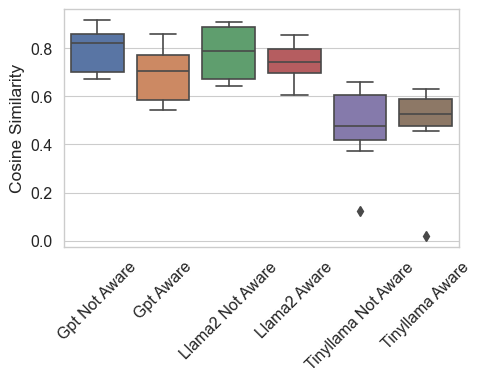

In [271]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.boxplot(data=similarity, ax=ax)
ax.set_xticklabels(["Gpt Not Aware", "Gpt Aware", "Llama2 Not Aware", "Llama2 Aware", "Tinyllama Not Aware", "Tinyllama Aware"])
ax.xaxis.set_tick_params(rotation=45)
plt.ylabel("Cosine Similarity")
plt.tight_layout()
plt.savefig("figures/rq3_cos.pdf")
plt.show()

In [255]:
similarity

,gpt_simple,llama_simple,tinyllama_simple,gpt_complex,llama_complex,tinyllama_complex
0,0.819126,0.908285,0.628128,0.543638,0.854296,0.018023
1,0.915121,0.866024,0.372627,0.747262,0.846458,0.454333
2,0.835710,0.907154,0.657306,0.856871,0.604571,0.570029
3,0.712283,0.678132,0.476030,0.703896,0.695731,0.525253
4,0.687548,0.641341,0.123286,0.795881,0.695216,0.606593
5,0.672776,0.788360,0.580144,0.598366,0.739888,0.631242
6,0.879300,0.666753,0.465915,0.570395,0.741090,0.502104


In [248]:
similarity.round(2).to_latex("tables/similarity.tex", float_format="%.2f")

## RQ 4

In [62]:
res2_t.groupby("Model")["Score"].aggregate(["mean", "median"]).to_latex("tables/rq4.tex", float_format="%.2f")

In [6]:
res2_t.groupby("Model")["Score"].aggregate(["mean", "median"])

,mean,median
Model,,
gpt,3.535714,4.50
llama,2.392857,2.25
tiny,1.892857,1.50


In [15]:
llama["Score"]

4     2.50
5     1.50
10    2.00
12    4.25
16    2.25
17    2.00
21    2.25
Name: Score, dtype: float64

In [14]:
tiny['Score']

3     2.00
6     1.50
9     1.00
13    1.75
14    4.50
18    1.50
22    1.00
Name: Score, dtype: float64

In [7]:
gpt = res2_t[res2_t["Model"] == "gpt"]
llama = res2_t[res2_t["Model"] == "llama"]
tiny = res2_t[res2_t["Model"] == "tiny"]

In [59]:
stats.ttest_rel(gpt["Score"], llama["Score"])

TtestResult(statistic=1.3020615340338553, pvalue=0.24064391263643042, df=6)

In [60]:
stats.ttest_rel(gpt["Score"], tiny["Score"])

TtestResult(statistic=1.6287225515786579, pvalue=0.15449494115283693, df=6)

In [61]:
stats.ttest_rel(llama["Score"], tiny["Score"])

TtestResult(statistic=0.9119666486866893, pvalue=0.39694729425931224, df=6)

In [32]:
count = res2_t.drop(columns="Score").melt(
    id_vars=["Model"],
    value_vars=["Score1", "Score2", "Score3", "Score4"],
    var_name="Score_type",
    value_name="Score",
) 

In [34]:
count['Score'] = count['Score'].astype(str)

/Users/giord/miniconda3/envs/xquantum/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/giord/miniconda3/envs/xquantum/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/giord/miniconda3/envs/xquantum/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/giord/miniconda3/envs/xquantu

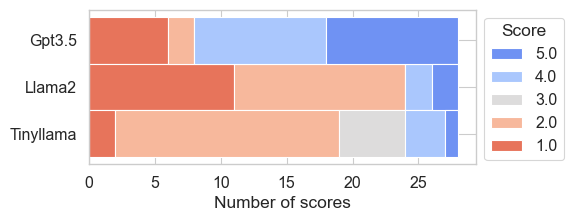

In [36]:
fig, ax = plt.subplots(figsize=(5, 2))
ax = sns.histplot(
    data=count,
    y="Model",
    hue="Score",
    multiple="stack",
    palette="coolwarm",
    hue_order=["5.0", "4.0", "3.0", "2.0", "1.0"],
    alpha=1,
)
ax.set(xlabel="Number of scores", ylabel="")
ax.yaxis.set_ticklabels(["Gpt3.5", "Llama2", "Tinyllama"])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.savefig("figures/rq1_dist.pdf", bbox_inches="tight")
plt.show()

## Correlation analysis

In [35]:
corr_data = res
corr_data.columns = corr_data.iloc[0]
corr_data.drop([0, 1, 2], inplace=True)
corr_data = corr_data.melt(id_vars=["SE_Expertise", "Quantum_Expertise"])

In [44]:
quantum_map = {
  'Under a year': 0,
  '1-2 years': 1,
  '3-4 years': 2,
}
corr_data['Quantum_Expertise_ord'] = corr_data['Quantum_Expertise'].map(quantum_map)

In [51]:
corr_data['value'] = corr_data['value'].astype(float)

In [45]:
corr_data

,SE_Expertise,Quantum_Expertise,0,value,SE_Expertise_ord,Quantum_Expertise_ord
0,5-10 years,3-4 years,Run1,2,1,2
1,3-4 years,1-2 years,Run1,3,0,1
2,3-4 years,1-2 years,Run1,2,0,1
3,5-10 years,Under a year,Run1,3,1,0
4,5-10 years,3-4 years,Run1,4,1,2
...,...,...,...,...,...,...
499,5-10 years,Under a year,Run3,2,1,0
500,5-10 years,3-4 years,Run3,5,1,2
501,3-4 years,1-2 years,Run3,3,0,1
502,3-4 years,1-2 years,Run3,4,0,1


In [57]:
corr_data.groupby("SE_Expertise")["value"].mean()

SE_Expertise
3-4 years     2.349206
5-10 years    2.416667
Name: value, dtype: float64

In [58]:
corr_data.groupby("Quantum_Expertise")["value"].mean()

Quantum_Expertise
1-2 years       2.349206
3-4 years       2.428571
Under a year    2.404762
Name: value, dtype: float64

In [52]:
stats.pearsonr(corr_data['SE_Expertise_ord'], corr_data['value'])

PearsonRResult(statistic=0.029187441953603545, pvalue=0.5132608063382087)

In [53]:
stats.pearsonr(corr_data["Quantum_Expertise_ord"], corr_data["value"])

PearsonRResult(statistic=0.007284225222664169, pvalue=0.8704187803220691)

## Demographic Information

In [9]:
res.columns = res.iloc[0]

In [12]:
res.drop([0, 1, 2], inplace=True)

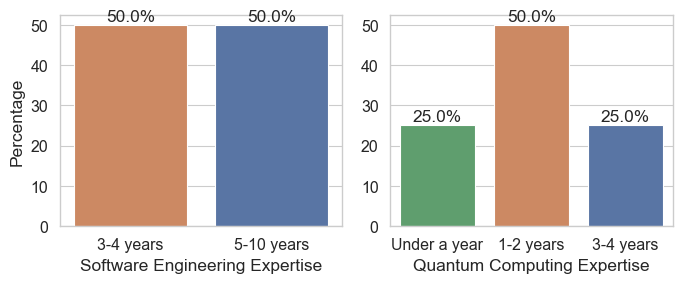

In [41]:
fig, ax = plt.subplots(1,2, figsize=(7, 3))

# Primo subplot
sns.countplot(data=res, x="SE_Expertise", stat="percent", hue="SE_Expertise", ax=ax[0], order=['3-4 years', '5-10 years'])
ax[0].set(ylabel="Percentage", xlabel="Software Engineering Expertise")
# ax[0].set_title('Distribution of Software Engineering Expertise')
for p in ax[0].patches:
    ax[0].annotate(str(p.get_height())+'%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()-1), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Secondo subplot
sns.countplot(data=res, x="Quantum_Expertise", stat="percent", hue="Quantum_Expertise", ax=ax[1], order=['Under a year', '1-2 years', '3-4 years'])
ax[1].set(ylabel="", xlabel="Quantum Computing Expertise")
# ax[1].set_title('Distribution of Quantum Computing Expertise')
for p in ax[1].patches:
    ax[1].annotate(str(p.get_height())+'%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()-1), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.tight_layout()
plt.savefig("figures/expertise.pdf")